In [1]:
import pandas as pd
import numpy as np
import re
import sklearn

from sklearn.feature_extraction.text import CountVectorizer
from scipy import sparse

In [2]:
df = pd.read_csv('../data/obf_data.csv')
df

,payload,length,is_obf,label
0,c/ caridad s/n OR 1123-398=1394-363 OR 960-75=...,233,1,0
1,"campello , el AND 167-158=560-551 OR 772-763=8...",294,1,0
2,41159-975 AND 370-366=609-605 AND 987-979=624-...,748,1,0
3,1442431887503494-164 AND 649-648=369-368,40,1,0
4,nue836-799 OR 1610-645=2127-248 AND 931-927=88...,581,1,0
...,...,...,...,...
30151,"170-169' and extractvalue 8981-999 , concat 37...",563,1,1
30152,"409-408"" order by 810-809-- OR 954-431=1452-17...",959,1,1
30153,380-379' procedure analyse extractvalue 6547-7...,977,1,1
30154,875-874 rlike select * from select sleep 276-2...,100,1,1


In [3]:
count_vect = CountVectorizer(analyzer='word', ngram_range=(3,3))
raw_counts = count_vect.fit_transform(df['payload'])

# Display features
features = count_vect.get_feature_names()
print('Number of features: ' + str(len(features)))

Number of features: 2532857


In [9]:
num_feats = df[['length']].values
all_data = sparse.hstack((raw_counts, num_feats))
all_labels = df['label'].values

In [10]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(all_data, all_labels, test_size=0.3)

In [11]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier().fit(train_data, train_labels)
classifier_type = 'Random Forest'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [12]:
# Run inference on the test data and predict labels for each data point in the test data
predicted_labels = classifier.predict(test_data)

# Calculate and print the following metrics: precision, recall, f1-measure, and accuracy
from sklearn import metrics
precision = metrics.precision_score(test_labels, predicted_labels)
recall = metrics.recall_score(test_labels, predicted_labels)
f1measure = metrics.f1_score(test_labels, predicted_labels)
accuracy = metrics.accuracy_score(test_labels, predicted_labels)

print(' precision = ' + str(precision))
print('    recall = ' + str(recall))
print('F1-measure = ' + str(f1measure))
print('  accuracy = ' + str(accuracy))
print('\n')

 precision = 0.9977457168620378
    recall = 0.6734631771150335
F1-measure = 0.8041424418604651
  accuracy = 0.8808444788327623




In [14]:
for i in np.argsort(classifier.feature_importances_)[::-1][0:10]:
    if(i == 2532857):
        print('string length')
        continue
    print(features[i])

union all select
select case when
select from select
select count from
select null null
all select null
null null null
from dual chr
left crypt_key char
repeat right char


['union all select', 'select case when', 'select from select', 'select count from', 'select null null', 'all select null', 'null null null', 'from dual chr', 'left crypt_key char', 'repeat right char']


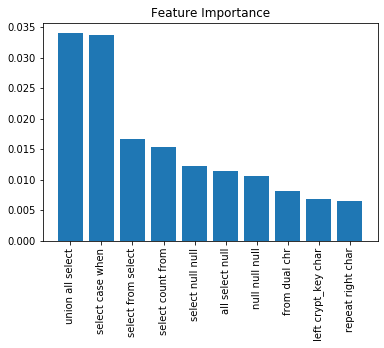

In [16]:
import matplotlib.pyplot as plt
indices = np.argsort(classifier.feature_importances_)[::-1][0:10]
features.append('string length')
names = [features[i] for i in indices]
print(names)
plt.figure()
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(10), classifier.feature_importances_[indices])
# Add feature names as x-axis labels
plt.xticks(range(10), names, rotation=90)

# Show plot
plt.show()